Sliding window, interval is a year.

Get sum sq diff of each interval, Create a Graph

Get its volume. 

Repeat until you have an array of graph volumes.

This should tell you how the overall sector is correlated.

In [14]:
import numpy as np
import pandas as pd
import os
from IPython.display import clear_output
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime 

In [38]:
#How do I #define in python?
DAYS_IN_YEAR = 365
DAYS_MARKET_IS_OPEN = 252

In [2]:
def sum_of_sq_diff(series1: np.array, series2: np.array):
    """
    Sum of square differences of the two series. 
    Must both be numpy arrays of the same size.
    """
    size = series1.__len__()
    assert size == series2.__len__(), f'Series 1 has size {size} while Series 2 has size {series2.__len__()}'

    #Check for normalization
    if np.max(series1) > 1.0:
        series1 = normalize_data(series1)
    if np.max(series2) > 1.0:
        series2 = normalize_data(series2)

    sum = 0
    for i in range(size):
        absdiff = abs(series1[i] - series2[i])
        absdiff**2
        sum += absdiff
    
    sum = sum / float(size)
    return sum


def normalize_data(series: np.array):
    """
    Returns the array with each entry divided by the series max.
    """
    max = np.max(series)
    return series/max

In [5]:
df = pd.read_excel("Data\\Normalized Data.xlsx", header=0, )
df

,Ticker,ETF,Number of ETFs,12/03/2018,12/04/2018,12/06/2018,12/07/2018,12/10/2018,12/11/2018,12/12/2018,...,11/17/2023,11/20/2023,11/21/2023,11/22/2023,11/24/2023,11/27/2023,11/28/2023,11/29/2023,11/30/2023,12/01/2023
0,WPC,"['IYR', 'REET', 'USRT']",3,50.143265,49.858727,51.069809,50.799870,51.128181,51.441891,50.544518,...,56.540001,57.060001,57.869999,58.389999,58.830002,59.150002,61.610001,62.189999,62.240002,63.380001
1,SHO,['REET'],1,13.426115,13.030193,13.188562,12.942211,12.695862,12.599080,12.687059,...,9.930000,9.940000,9.770000,9.840000,9.910000,9.850000,9.820000,9.750000,9.880000,10.040000
2,MPW,"['IYR', 'REET', 'REZ', 'USRT']",4,12.324441,12.260550,12.416734,12.047567,12.054668,12.083065,12.032631,...,4.610000,4.850000,4.540000,4.550000,4.670000,4.820000,4.760000,4.900000,4.850000,5.210000
3,AHH,['REET'],1,11.646695,11.294692,11.677305,11.623737,11.524260,11.463041,11.424780,...,10.680000,10.770000,10.570000,10.670000,10.700000,10.660000,10.660000,10.800000,10.980000,11.370000
4,COF,['REET'],1,82.513443,77.424179,77.168808,75.399429,75.198776,74.204651,74.824837,...,107.680000,107.150002,105.779999,106.769997,106.570000,106.180000,108.580002,110.129997,111.660004,113.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TRTX,['REM'],1,10.168003,10.029351,10.039621,10.013945,10.024218,10.013945,10.003672,...,5.830000,5.730000,5.650000,5.590000,5.630000,5.540000,5.530000,5.790000,5.910000,6.180000
163,DLR,"['ICF', 'IYR', 'REET', 'USRT']",4,96.759239,94.847237,97.602509,96.617310,97.143311,97.510666,96.517113,...,134.529999,135.839996,136.210007,136.830002,136.500000,137.449997,136.899994,138.199997,138.779999,138.610001
164,LADR,['REM'],1,11.725146,11.502059,11.777636,11.669210,11.581115,11.587891,11.655659,...,11.020000,11.080000,10.980000,11.010000,11.050000,10.990000,10.920000,11.190000,11.210000,11.480000
165,KRC,"['IYR', 'REET', 'USRT']",3,58.177364,56.989567,58.655785,58.292854,57.162788,55.249115,54.300526,...,30.930000,30.969999,30.280001,30.309999,30.180000,30.450001,32.139999,33.310001,32.980000,35.410000


In [47]:
stocks = np.ndarray((df.__len__(), DAYS_MARKET_IS_OPEN))
volume = []

num_intervals = df.columns.__len__() -2- DAYS_MARKET_IS_OPEN 

for k in range(num_intervals):
    clear_output(wait=True)

    #This end days dont exactly match up, but there could be some 
    #unaccounted days the market is not open, so this is fine
    interval = df.columns[3+k:3+k+DAYS_MARKET_IS_OPEN]
    df_subset = df[interval]

    for i in range(df_subset.__len__()):
        stocks[i, :] = df_subset.iloc[i, :].to_numpy(dtype=float)

    #Normalize stocks
    for i, row in enumerate(stocks):
        stocks[i, :] = normalize_data(row)

    #Sum to append to volume array
    sum = 0
    #Getting sum of Squares
    edge_weight = []
    for i in range(stocks.shape[0]):
        for j in range(i+1, stocks.shape[0]):
            sum += sum_of_sq_diff(stocks[i], stocks[j])
    
    volume.append(sum)
    print(f'Percentage Done: {round(k / num_intervals * 100.0, 3)}')

Percentage Done: 99.901


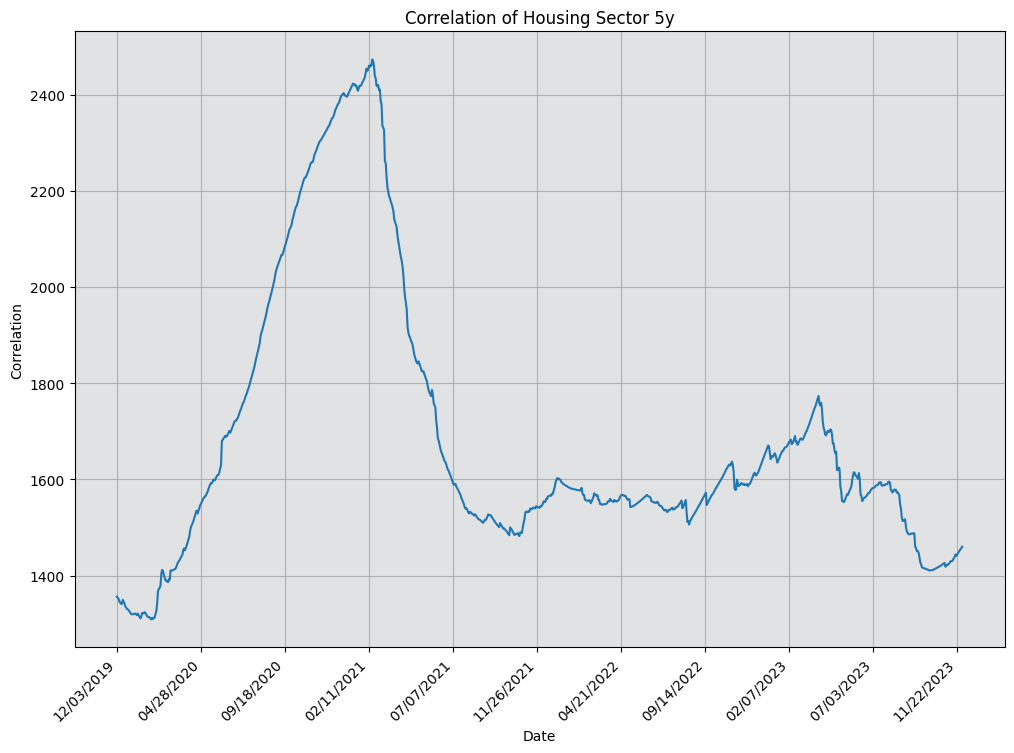

In [72]:
#This is the moving yearly average of correlation of the housing sector.
#The date shown it the end date
volume = np.array(volume)
fig, axs = plt.subplots(1, 1, figsize = (12, 8))

axs.plot(df.columns[3+(DAYS_MARKET_IS_OPEN-1):], volume)

xticks_positions = df.columns[3+(DAYS_MARKET_IS_OPEN-1)::100]
axs.set_xticks(xticks_positions, )
axs.set_xticklabels(xticks_positions, rotation = 45, ha= 'right')
axs.grid(True)
axs.set_facecolor("#e1e2e3")
axs.set_ylabel(r'Correlation')
axs.set_xlabel("Date")
axs.set_title("Correlation of Housing Sector 5y")
plt.show()

In [174]:
#Saving data 
correl_data = {'Date': df.columns[3+(DAYS_MARKET_IS_OPEN-1):],
               'Correlation': volume}
correl_data_df = pd.DataFrame(correl_data)
for i, date in enumerate(correl_data_df['Date']):
    if isinstance(date, str): 
        print(date)
        correl_data_df['Date'][i] = datetime.strptime(date, '%m/%d/%Y')

correl_data_df.to_excel("Correlation data.xlsx", index=False)

12/03/2019
12/04/2019
12/05/2019
12/06/2019
12/09/2019
12/10/2019
12/11/2019
12/12/2019
12/13/2019
12/16/2019
12/17/2019
12/18/2019
12/19/2019
12/20/2019
12/23/2019
12/24/2019
12/26/2019
12/27/2019
12/30/2019
12/31/2019
01/02/2020
01/03/2020
01/06/2020
01/07/2020
01/08/2020
01/09/2020
01/10/2020
01/13/2020
01/14/2020
01/15/2020
01/16/2020
01/17/2020
01/21/2020
01/22/2020
01/23/2020
01/24/2020
01/27/2020
01/28/2020
01/29/2020
01/30/2020
01/31/2020
02/03/2020
02/04/2020
02/05/2020
02/06/2020
02/07/2020
02/10/2020
02/11/2020
02/12/2020
02/13/2020
02/14/2020
02/18/2020
02/19/2020
02/20/2020
02/21/2020
02/24/2020
02/25/2020
02/26/2020
02/27/2020
02/28/2020
03/02/2020
03/03/2020
03/04/2020
03/05/2020
03/06/2020
03/09/2020
03/10/2020
03/11/2020
03/12/2020
03/13/2020
03/16/2020
03/17/2020
03/18/2020
03/19/2020
03/20/2020
03/23/2020
03/24/2020
03/25/2020
03/26/2020
03/27/2020
03/30/2020
03/31/2020
04/01/2020
04/02/2020
04/03/2020
04/06/2020
04/07/2020
04/08/2020
04/09/2020
04/13/2020
04/14/2020

C:\Users\Caleb\AppData\Local\Temp\ipykernel_12404\3134020970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correl_data_df['Date'][i] = datetime.strptime(date, '%m/%d/%Y')
C:\Users\Caleb\AppData\Local\Temp\ipykernel_12404\3134020970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correl_data_df['Date'][i] = datetime.strptime(date, '%m/%d/%Y')
C:\Users\Caleb\AppData\Local\Temp\ipykernel_12404\3134020970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Relate against 

GDP
https://ycharts.com/indicators/us_monthly_gdp

Inflation
https://fred.stlouisfed.org/series/CUUR0000SAH1

Interest Rates 
https://fred.stlouisfed.org/series/MORTGAGE30US

Covid 
https://ourworldindata.org/coronavirus/country/united-states

U6 unemployment
https://ycharts.com/indicators/us_u_6_unemployment_rate_unadjusted

The US U-6 Unemployment Rate measures the total number of employees in the United States that are a part of the labor force, but are without a job. Unemployment rates can be a good gauge for how the economy is performing in a particular region. Historically, the US U-6 Unemployment Rate reached as high as 18% in 2010. The U-6 rate differs from the more commonly reported U-3 rate in that it also includes workers that are discouraged and underemployed. This might give a better idea on how to US economy is functioning, since it captures a larger labor force.



In [161]:
covid_df = pd.read_csv("Data\\Misc Data\\owid-covid-data Simplified.csv",)
covid_df = covid_df.iloc[:, [0, 2]]
inflation_df = pd.read_excel("Data\\Misc Data\\Inflation Shelter.xls", skiprows=10, header=0)
inflation_df = inflation_df.iloc[:, [0, 2]]
gdp_df = pd.read_excel("Data\\Misc Data\\GDP Rel Growth.xlsx")
interest_df = pd.read_excel("Data\\Misc Data\\MORTGAGE30US.xls", skiprows = 10, header=0)
unemployment_df = pd.read_excel("Data\\Misc Data\\U6 unemployment.xlsx", header=None)

In [162]:
#Normalize all data
#Inflation (Shelter)
inflation_df.iloc[0, 1] = 0
inflation_df['change'] = inflation_df['change']/max(inflation_df['change'])
inflation_df.columns = ['date', 'value']
#GDP
gdp_df.iloc[0, 1] = 0
gdp_df.iloc[:, 1] = gdp_df.iloc[:, 1]/max(gdp_df.iloc[:, 1])
gdp_df.columns = ['date', 'value']
#Covid
covid_df['new_cases'] = covid_df['new_cases']/max(covid_df['new_cases'])
covid_df.columns = ['date', 'value']
#Unemployment
unemployment_df.iloc[:, 1] = unemployment_df.iloc[:, 1]/max(unemployment_df.iloc[:, 1])
unemployment_df.columns = ['date', 'value']
#Interest
interest_df.iloc[:, 1] = interest_df.iloc[:, 1]/max(interest_df.iloc[:, 1])
interest_df.columns = ['date', 'value']

In [169]:
date_range = pd.date_range(start=interest_df['date'].min(), end=interest_df['date'].max(), freq='D')
interest_df_test = interest_df.set_index('date').reindex(date_range).reset_index()

In [171]:
interest_df_test

,index,value
0,2018-12-06,0.609756
1,2018-12-07,NaN
2,2018-12-08,NaN
3,2018-12-09,NaN
4,2018-12-10,NaN
...,...,...
1816,2023-11-26,NaN
1817,2023-11-27,NaN
1818,2023-11-28,NaN
1819,2023-11-29,NaN
